In [66]:
#!pip install -U imbalanced-learn

In [67]:
#!pip install imlearn

In [68]:
#pip install xgboost

In [69]:
#pip install pickle

In [70]:
#pip install joblib

##  importing library

In [12]:
import numpy as np # linear algebra
import pandas as pd # data processing, 
import joblib
from joblib import dump, load
# Libraries for data visualization
import matplotlib.pyplot as plt  
import seaborn as sns 

from sklearn.metrics import recall_score, precision_score, accuracy_score, f1_score

from sklearn.metrics import confusion_matrix,auc,roc_curve, roc_auc_score,classification_report
# Import scikit_learn module to split the dataset into train.test sub-datasets
from sklearn.model_selection import train_test_split ,KFold,cross_val_score
# Import scikit_learn module for k-fold cross validation

from sklearn import metrics
from scipy import stats
import configparser


from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import RandomizedSearchCV

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier
import pickle
import os
import imblearn

# Loading data

In [13]:
#dont run it twice

path = os.getcwd()
os.chdir('../')
path


'D:\\Shivam\\Upwork\\JoleneMartin\\1\\notebook'

In [18]:
pd.options.mode.chained_assignment = None 
np.random.seed(30)

config = configparser.ConfigParser()
config.read('config.ini')
input_path = config['train_path']['InputPath']
#output_path = config['train_path']['OutputPath']

In [19]:
data = pd.read_csv(input_path )

In [20]:
data.columns

Index(['id', 'age', 'workclass', 'education', 'education_num',
       'marital_status', 'occupation', 'relationship', 'race', 'sex',
       'capital_gain', 'capital_loss', 'hours_per_week', 'native_country',
       'over_50k'],
      dtype='object')

In [21]:
data.head()
data.isna().sum().sum()

0

# min max scaling

In [22]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
numerical=['age','education_num','capital_gain','capital_loss','hours_per_week']
data[numerical] = scaler.fit_transform(data[numerical])
data1=data
data

,id,age,workclass,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,over_50k
0,12106,0.226667,Private,HS-grad,0.533333,Divorced,Adm-clerical,Other-relative,White,Female,0.500000,0.360634,0.156627,United-States,<=50K
1,28951,0.373333,State-gov,Some-college,0.600000,Divorced,Adm-clerical,Unmarried,White,Female,0.500000,0.360634,0.156627,United-States,<=50K
2,24570,0.266667,Private,HS-grad,0.533333,Married-civ-spouse,Exec-managerial,Wife,White,Female,0.500000,0.360634,0.156627,United-States,>50K
3,9375,0.653333,Private,Some-college,0.600000,Married-civ-spouse,Exec-managerial,Wife,White,Female,0.552831,0.360634,0.136546,United-States,<=50K
4,10738,0.533333,Private,Some-college,0.600000,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.500000,0.360634,0.277108,United-States,>50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22079,8517,0.253333,Private,9th,0.266667,Never-married,Sales,Own-child,Other,Female,0.500000,0.360634,0.124498,United-States,<=50K
22080,20082,0.546667,Private,Bachelors,0.800000,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.522540,0.360634,0.156627,United-States,<=50K
22081,547,0.573333,Private,10th,0.333333,Married-civ-spouse,Other-service,Wife,White,Female,0.500000,0.360634,0.028112,United-States,<=50K
22082,28777,0.320000,Private,HS-grad,0.600000,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.500000,0.360634,0.156627,United-States,>50K


# Changing categorical to numerical for training data

In [23]:
#Changing categorical to ordinal
data['over_50k'] = data['over_50k'].map({'<=50K': 0, '>50K': 1}).astype(int)
data['sex'] = data['sex'].map({'Male': 0, 'Female': 1}).astype(int)
data['race'] = data['race'].map({'Black': 0, 'Asian-Pac-Islander': 1,'Other': 2, 'White': 3, 'Amer-Indian-Eskimo': 4}).astype(int)
data['marital_status'] = data['marital_status'].map({'Married-spouse-absent': 0, 'Widowed': 1, 'Married-civ-spouse': 2, 'Separated': 3, 'Divorced': 4,'Never-married': 5, 'Married-AF-spouse': 6}).astype(int)
data['workclass'] = data['workclass'].map({'Self-emp-inc': 0, 'State-gov': 1,'Federal-gov': 2, 'Without-pay': 3, 'Local-gov': 4,'Private': 5, 'Self-emp-not-inc': 6}).astype(int)
data['education'] = data['education'].map({'Some-college': 0, 'Preschool': 1, '5th-6th': 2, 'HS-grad': 3, 'Masters': 4, '12th': 5, '7th-8th': 6, 'Prof-school': 7,'1st-4th': 8, 'Assoc-acdm': 9, 'Doctorate': 10, '11th': 11,'Bachelors': 12, '10th': 13,'Assoc-voc': 14,'9th': 15}).astype(int)
data['relationship'] = data['relationship'].map({'Not-in-family': 0, 'Wife': 1, 'Other-relative': 2, 'Unmarried': 3,'Husband': 4,'Own-child': 5}).astype(int)
data['occupation'] = data['occupation'].map(
    { 'Farming-fishing': 1, 'Tech-support': 2, 'Adm-clerical': 3, 'Handlers-cleaners': 4, 
 'Prof-specialty': 5,'Machine-op-inspct': 6, 'Exec-managerial': 7,'Priv-house-serv': 8,'Craft-repair': 9,'Sales': 10, 'Transport-moving': 11, 'Armed-Forces': 12, 'Other-service': 13,'Protective-serv':14}).astype(int)

data.head()


,id,age,workclass,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,over_50k
0,12106,0.226667,5,3,0.533333,4,3,2,3,1,0.500000,0.360634,0.156627,United-States,0
1,28951,0.373333,1,0,0.600000,4,3,3,3,1,0.500000,0.360634,0.156627,United-States,0
2,24570,0.266667,5,3,0.533333,2,7,1,3,1,0.500000,0.360634,0.156627,United-States,1
3,9375,0.653333,5,0,0.600000,2,7,1,3,1,0.552831,0.360634,0.136546,United-States,0
4,10738,0.533333,5,0,0.600000,2,7,4,3,0,0.500000,0.360634,0.277108,United-States,1


# Dropping some unwanted columns

In [24]:
data=data.drop('id', axis=1)
data=pd.get_dummies(data, drop_first=True)
data

,age,workclass,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,...,native_country_Portugal,native_country_Puerto-Rico,native_country_Scotland,native_country_South,native_country_Taiwan,native_country_Thailand,native_country_Trinadad&Tobago,native_country_United-States,native_country_Vietnam,native_country_Yugoslavia
0,0.226667,5,3,0.533333,4,3,2,3,1,0.500000,...,0,0,0,0,0,0,0,1,0,0
1,0.373333,1,0,0.600000,4,3,3,3,1,0.500000,...,0,0,0,0,0,0,0,1,0,0
2,0.266667,5,3,0.533333,2,7,1,3,1,0.500000,...,0,0,0,0,0,0,0,1,0,0
3,0.653333,5,0,0.600000,2,7,1,3,1,0.552831,...,0,0,0,0,0,0,0,1,0,0
4,0.533333,5,0,0.600000,2,7,4,3,0,0.500000,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22079,0.253333,5,15,0.266667,5,10,5,2,1,0.500000,...,0,0,0,0,0,0,0,1,0,0
22080,0.546667,5,12,0.800000,2,7,4,3,0,0.522540,...,0,0,0,0,0,0,0,1,0,0
22081,0.573333,5,13,0.333333,2,13,1,3,1,0.500000,...,0,0,0,0,0,0,0,1,0,0
22082,0.320000,5,3,0.600000,2,7,4,3,0,0.500000,...,0,0,0,0,0,0,0,1,0,0


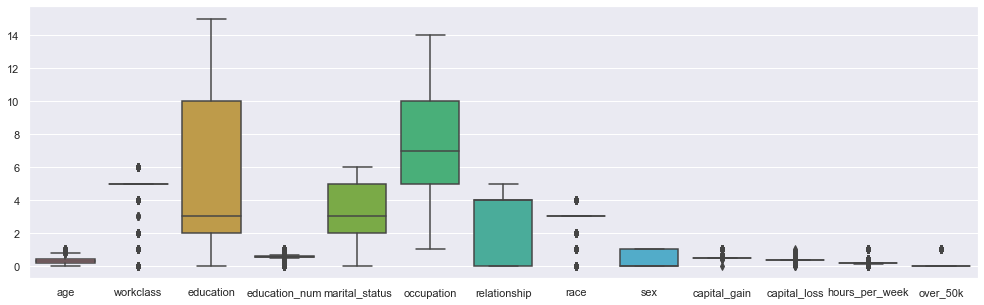

In [25]:
sns.set(rc={'figure.figsize':(17,5)})
datap=data.iloc[:,:13]
sns.boxplot(data=datap)

## Removing outliner

(22084, 53) (18274, 53)


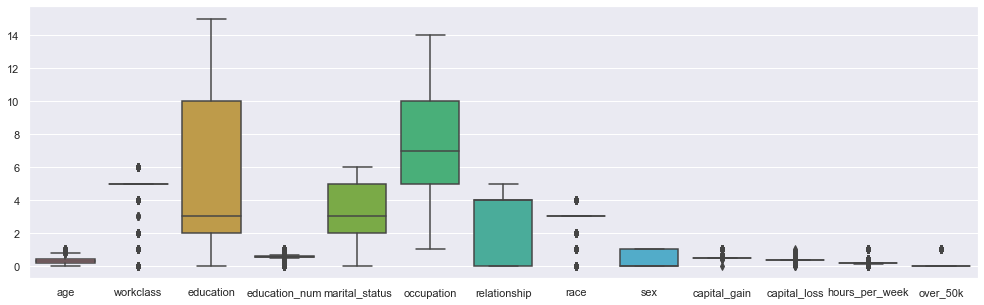

In [26]:
z = np.abs(stats.zscore(data))
dataz = data[(z < 3).all(axis=1)]
print(data.shape,dataz.shape)
datap=data.iloc[:,:13]
sns.boxplot(data=datap)


In [27]:
data=dataz

## Solving Data Imbalance

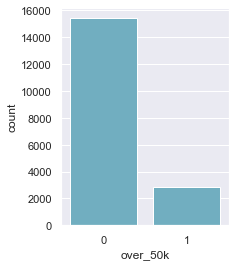

In [28]:
sns.set(rc={'figure.figsize':(3,4)})
sns.countplot(x="over_50k", data=data, color="c");

In [29]:
Y=pd.DataFrame(data['over_50k'])
X=data.drop(labels=['over_50k'], axis=1)
y=data['over_50k']

In [30]:
from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler()
X_rus, y_rus = rus.fit_sample(X, y)
X_rus.shape,y_rus.shape
y_rus.count(),y_rus.sum()
#y_rus.plot(kind='hist')

(5716, 2858)

In [31]:
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler()
X_ros, y_ros = ros.fit_sample(X, y)
X_ros.shape,y_ros.shape
y_ros.count(),y_ros.sum()
#y_rus.plot(kind='hist')

(30832, 15416)

# using SMOTE to create data balance

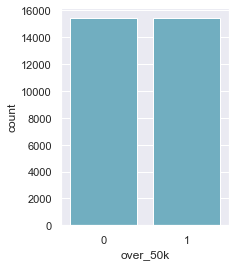

In [32]:

from imblearn.over_sampling import SMOTE

smote = SMOTE()
X_sm, y_sm = smote.fit_sample(X, y)
sns.countplot(x="over_50k", data=pd.DataFrame(y_sm), color="c");


c
Y=pd.DataFrame(data['over_50k'])
X=data.drop(labels=['over_50k'], axis=1)
y=data['over_50k']


# splitting  test train data


In [33]:
X=X_sm
y=y_sm
#X=X_ros
#y=y_ros



#Split the data into 77% training and 33% testing data
#NOTE: We have to split the dependent variables (x) and the target or independent variable (y)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

### Using K Fold

In [34]:
from sklearn.model_selection import KFold 
kf=KFold(n_splits=10, random_state=42, shuffle=True)

# X is the feature set and y is the target
for train_index, test_index in kf.split(X,y): 
   #print("Train:", train_index, "Validation:", val_index) 
    X_train, X_test = X.iloc[train_index,:], X.iloc[test_index,:]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    


# Score function

In [35]:
evaluation=pd.DataFrame()

In [36]:

def print_scores(y_test,y_pred,y_pred_prob):
    
    print('test-set confusion matrix:\n', confusion_matrix(y_test,y_pred)) 
    print("recall score: ", recall_score(y_test,y_pred))
    print("precision score: ", precision_score(y_test,y_pred))
    print("f1 score: ", f1_score(y_test,y_pred))
    print("accuracy score: ", accuracy_score(y_test,y_pred))
    print("ROC AUC: {}".format(roc_auc_score(y_test, y_pred_prob)))
    
    # Compute predicted probabilities: y_pred_prob
   
    
    # Generate ROC curve values: fpr, tpr, thresholds
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
    
    # Plot ROC curve
    import matplotlib.pyplot as plt
    plt.plot([0, 1], [0, 1], 'k--')
    plt.plot(fpr, tpr)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.show()
    return [recall_score(y_test,y_pred),precision_score(y_test,y_pred),f1_score(y_test,y_pred),accuracy_score(y_test,y_pred),roc_auc_score(y_test, y_pred_prob)]
    #print("ROC AUC" ,roc_auc_score(y_test, y_pred_prob))

## Prediction function

In [37]:

def get_predictions(clf, X_train, y_train, X_test):
    # create classifier
    clf = clf
    # fit it to training data
    clf.fit(X_train,y_train)
    # predict using test data
    y_pred = clf.predict(X_test)
    # Compute predicted probabilities: y_pred_prob
    y_pred_prob = clf.predict_proba(X_test)[:,1]
    #y_pred_prob = clf.predict_proba(X_test)
    # train-set predictions
    train_pred = clf.predict(X_train)
    print('train-set confusion matrix:\n', confusion_matrix(y_train,train_pred)) 
    return y_pred, y_pred_prob,clf

In [73]:
os.chdir(os.path.join(os.getcwd(), "model"))
os.getcwd()

'D:\\Shivam\\Upwork\\JoleneMartin\\1\\notebook\\model\\model\\model\\model\\model\\model'

### model- Naive bais

train-set confusion matrix:
 [[10336  3577]
 [ 2405 11431]]
test-set confusion matrix:
 [[1121  382]
 [ 279 1301]]
recall score:  0.8234177215189873
precision score:  0.7730243612596553
f1 score:  0.7974256818878331
accuracy score:  0.785598443074927
ROC AUC: 0.8709936666750886


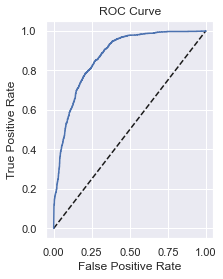

In [52]:
from sklearn.naive_bayes import GaussianNB

y_pred, y_pred_prob,model4 = get_predictions(GaussianNB(), X_train, y_train, X_test)
l=print_scores(y_test,y_pred,y_pred_prob)
algo='GaussianNB'
l.append(algo)
evaluation = evaluation.append([l],ignore_index=True)

In [53]:
##filename = 'model4.sav'
#pickle.dump(model4, open(filename, 'wb'))

### model- Logistic regression

train-set confusion matrix:
 [[ 9319  4594]
 [ 1865 11971]]
test-set confusion matrix:
 [[1012  491]
 [ 202 1378]]
recall score:  0.8721518987341772
precision score:  0.7372926698769395
f1 score:  0.7990721948390839
accuracy score:  0.775218942588388
ROC AUC: 0.8328484381448074


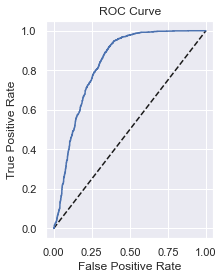

In [54]:
reg=LogisticRegression(max_iter=1000)
y_pred, y_pred_prob,model5 = get_predictions(reg, X_train, y_train, X_test)
l=print_scores(y_test,y_pred,y_pred_prob)
algo='LogisticRegression'
l.append(algo)
evaluation = evaluation.append([l],ignore_index=True)

In [64]:
#filename = 'model5.sav'
#pickle.dump(model5, open(filename, 'wb'))

### model- random forest

train-set confusion matrix:
 [[13675   238]
 [  215 13621]]
test-set confusion matrix:
 [[1346  157]
 [ 155 1425]]
recall score:  0.9018987341772152
precision score:  0.9007585335018964
f1 score:  0.9013282732447818
accuracy score:  0.898799870256244
ROC AUC: 0.9648702594810379


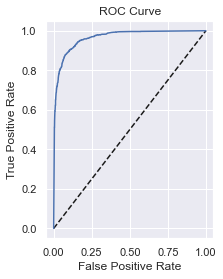

In [58]:
model_rf = BaggingClassifier(random_state=1211,oob_score=True,
                             max_features=X.shape[1],
                             n_estimators=100,
                             )
y_pred, y_pred_prob,model1 = get_predictions(model_rf, X_train, y_train, X_test)
l=print_scores(y_test,y_pred,y_pred_prob)
algo='Randomforest'
l.append(algo)
evaluation = evaluation.append([l],ignore_index=True)

In [59]:
#filename = 'model1.sav'
#pickle.dump(model1, open(filename, 'wb'))

### model- xgboost

train-set confusion matrix:
 [[13029   884]
 [  727 13109]]
test-set confusion matrix:
 [[1378  125]
 [ 108 1472]]
recall score:  0.9316455696202531
precision score:  0.9217282404508453
f1 score:  0.9266603714195781
accuracy score:  0.9244242620823873
ROC AUC: 0.9827469533506825


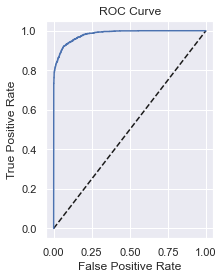

In [60]:
xgb=XGBClassifier(random_state=2000)
y_pred, y_pred_prob,model2 = get_predictions( xgb, X_train, y_train, X_test)
l=print_scores(y_test,y_pred,y_pred_prob)
algo='xgboost'
l.append(algo)
evaluation = evaluation.append([l],ignore_index=True)

In [61]:
filename = 'model2.sav'
pickle.dump(model2, open(filename, 'wb'))

### model- Artificial nueral network (MLP)

train-set confusion matrix:
 [[ 9808  4105]
 [  527 13309]]
test-set confusion matrix:
 [[1078  425]
 [  66 1514]]
recall score:  0.9582278481012658
precision score:  0.780814853017019
f1 score:  0.8604717249218528
accuracy score:  0.840739539409666
ROC AUC: 0.9104118766686038


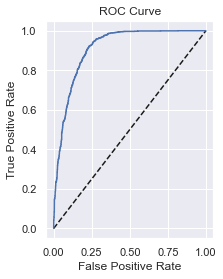

In [62]:

clf = MLPClassifier(hidden_layer_sizes=(100,100,100), max_iter=1000, alpha=0.0001,
                     solver='sgd', verbose=0,  random_state=21,tol=0.000000001)
y_pred, y_pred_prob,model3 = get_predictions( clf, X_train, y_train, X_test)
l=print_scores(y_test,y_pred,y_pred_prob)
algo='ANN'
l.append(algo)
evaluation = evaluation.append([l],ignore_index=True)

In [63]:
filename = 'model3.sav'
pickle.dump(model3, open(filename, 'wb'))

In [65]:
col=['recall_score','precision_score','f1_score','accuracy_score','roc_auc_score','model']
evaluation.columns=col
evaluation

,recall_score,precision_score,f1_score,accuracy_score,roc_auc_score,model
0,0.823418,0.773024,0.797426,0.785598,0.870994,GaussianNB
1,0.872152,0.737293,0.799072,0.775219,0.832848,LogisticRegression
2,0.823418,0.773024,0.797426,0.785598,0.870994,GaussianNB
3,0.872152,0.737293,0.799072,0.775219,0.832848,LogisticRegression
4,0.901899,0.900759,0.901328,0.898800,0.964870,Randomforest
5,0.931646,0.921728,0.926660,0.924424,0.982747,xgboost
6,0.958228,0.780815,0.860472,0.840740,0.910412,ANN


In [ ]:
-

# Best results came from xgboost so we will use grid searchcv for making it better

In [ ]:
params = {
        'min_child_weight': [1, 5, 10],
        'gamma': [0.5, 1, 1.5, 2, 5],
        'subsample': [0.2, 0.4, 0.6],
        'colsample_bytree': [0.6, 0.8, 1.0],
        'max_depth': [3, 4, 5]
        }

xgb = XGBClassifier(learning_rate=0.02, n_estimators=600, objective='binary:logistic',
                    silent=True, nthread=1)

folds = 3
param_comb = 5

skf = StratifiedKFold(n_splits=folds, shuffle = True, random_state = 1001)

random_search = RandomizedSearchCV(xgb, param_distributions=params, n_iter=param_comb, scoring='roc_auc', n_jobs=4, cv=skf.split(X,y), verbose=3, random_state=1001 )

random_search.fit(X, y)

#print('\n All results:',random_search.cv_results)

print('\n Best estimator:')
print(random_search.best_estimator_)

In [ ]:

print('\n Best normalized gini score for %d-fold search with %d parameter combinations:' % (folds, param_comb))
print(random_search.best_score_ * 2 - 1)
print('\n Best hyperparameters:')
print(random_search.best_params_)

# We are getting around 98% of accuracy